In [13]:
import pandas as pd

# Load MLB stadium data
url = "https://raw.githubusercontent.com/jldbc/pybaseball/master/pybaseball/data/mlbstadiums.csv"
mlb_stadiums_df = pd.read_csv(url, index_col=0)


Average dimensions: {'LF': nan, 'LCF': nan, 'CF': nan, 'RCF': nan, 'RF': nan}


In [16]:
# Calculate average coordinates for other segments
average_coords = {}
segments = ['home_plate', 'foul_lines', 'infield_inner', 'infield_outer', 'outfield_inner']

for segment in segments:
    avg_x = mlb_stadiums_df[mlb_stadiums_df['segment'] == segment]['x'].mean()
    avg_y = mlb_stadiums_df[mlb_stadiums_df['segment'] == segment]['y'].mean()
    average_coords[segment] = (avg_x, avg_y)

print("Average coordinates:", average_coords)

Average coordinates: {'home_plate': (125.18873388831437, 201.50335828477137), 'foul_lines': (124.68662339495351, 155.02113863231173), 'infield_inner': (124.74432268785732, 175.96662946712078), 'infield_outer': (125.94711276448972, 170.5887191741827), 'outfield_inner': (124.95004446737653, 124.1637196720236)}


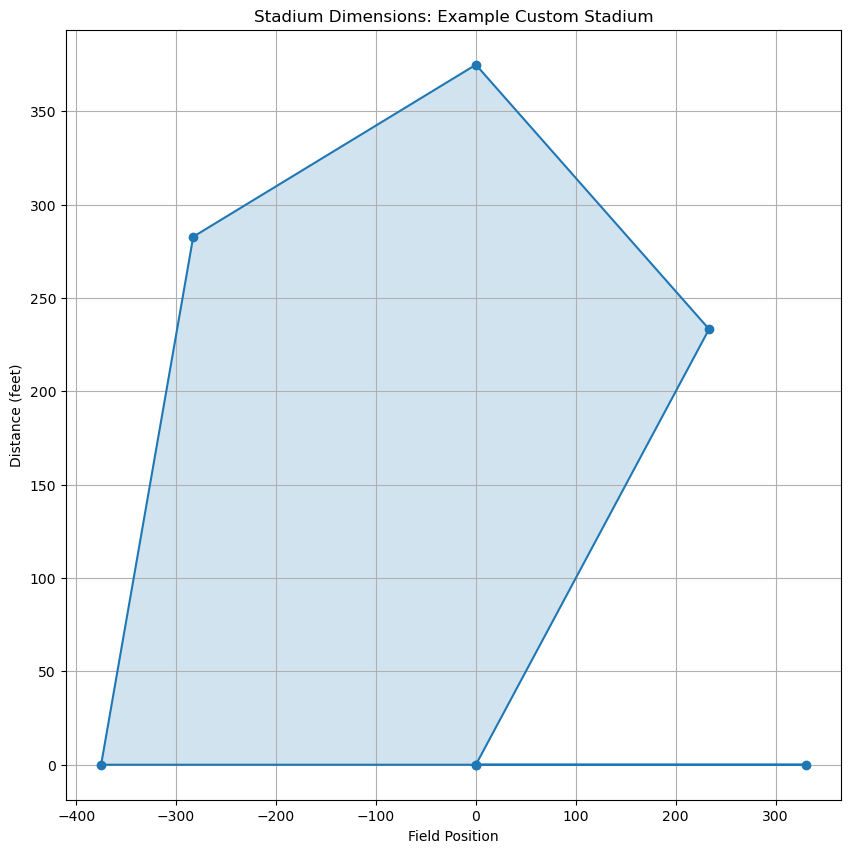

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_custom_stadium(LF, LCF, CF, RCF, RF, team_name="Custom Stadium"):
    # Define the angles for the outfield segments (in degrees)
    angles = [0, 45, 90, 135, 180]

    # Calculate the x and y coordinates for each point based on the angles
    x_coords = [
        0,
        LF * np.cos(np.radians(angles[1])),
        LCF * np.cos(np.radians(angles[2])),
        CF * np.cos(np.radians(angles[3])),
        RCF * np.cos(np.radians(angles[4])),
        RF * np.cos(np.radians(angles[0])),
        0
    ]
    
    y_coords = [
        0,
        LF * np.sin(np.radians(angles[1])),
        LCF * np.sin(np.radians(angles[2])),
        CF * np.sin(np.radians(angles[3])),
        RCF * np.sin(np.radians(angles[4])),
        RF * np.sin(np.radians(angles[0])),
        0
    ]

    # Plot the stadium
    plt.figure(figsize=(10, 10))
    plt.plot(x_coords, y_coords, 'o-')
    plt.fill(x_coords, y_coords, alpha=0.2)
    plt.title(f'Stadium Dimensions: {team_name}')
    plt.xlabel('Field Position')
    plt.ylabel('Distance (feet)')
    plt.grid(True)
    plt.show()

# Example usage with specific dimensions
plot_custom_stadium(330, 375, 400, 375, 330, team_name="Example Custom Stadium")


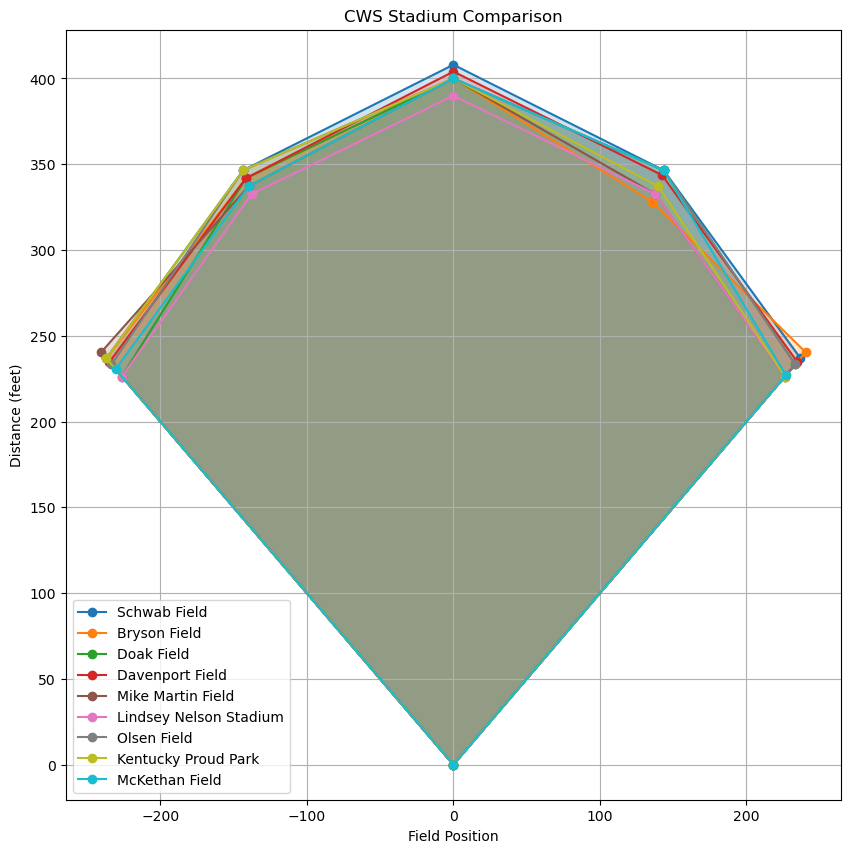

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_coordinates(LF, LCF, CF, RCF, RF):
    # Define the angles for each point (in degrees)
    angles = [135, 112.5, 90, 67.5, 45]

    # Calculate the x and y coordinates for each point based on the angles
    x_coords = [
        0,
        LF * np.cos(np.radians(angles[0])),
        LCF * np.cos(np.radians(angles[1])),
        CF * np.cos(np.radians(angles[2])),
        RCF * np.cos(np.radians(angles[3])),
        RF * np.cos(np.radians(angles[4])),
        0
    ]
    
    y_coords = [
        0,
        LF * np.sin(np.radians(angles[0])),
        LCF * np.sin(np.radians(angles[1])),
        CF,
        RCF * np.sin(np.radians(angles[3])),
        RF * np.sin(np.radians(angles[4])),
        0
    ]
    
    return x_coords, y_coords

def plot_multiple_stadiums(stadiums):
    plt.figure(figsize=(10, 10))
    
    # Define colors for each stadium
    colors = plt.cm.get_cmap('tab10', len(stadiums))

    for idx, stadium in enumerate(stadiums):
        name, dimensions = stadium
        x_coords, y_coords = calculate_coordinates(*dimensions)
        
        # Plot the stadium
        plt.plot(x_coords, y_coords, 'o-', label=name, color=colors(idx))
        plt.fill(x_coords, y_coords, alpha=0.2, color=colors(idx))
    
    plt.title('CWS Stadium Comparison')
    plt.xlabel('Field Position')
    plt.ylabel('Distance (feet)')
    plt.grid(True)
    plt.legend()
    plt.show()

# CWS stadiums
stadiums = [
    ("Schwab Field", [335, 375, 408, 375, 335]), # Omaha
    ("Bryson Field", [335, 370, 400, 355, 340]), #UNC
    ("Doak Field", [320, 370, 400, 375, 330]), #NCSU
    ("Davenport Field", [332, 370, 404, 372, 332]), #UVA
    ("Mike Martin Field", [340, 365, 400, 360, 320]), #FSU
    ("Lindsey Nelson Stadium", [320, 360, 390, 360, 320]),#Tenn
    ("Olsen Field", [330, 375, 400, 375, 330]),#aTm
    ("Kentucky Proud Park", [335, 375, 400, 365, 320]), #UK
    ("McKethan Field", [326, 365, 400, 375, 321]) #UF
]

# Plot the stadiums
plot_multiple_stadiums(stadiums)
